In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams.update({'font.size': 15})
#plt.rcParams["figure.figsize"] = (10,10)

## Mass Plots

In [14]:
char_csv = './GW_table.csv' #'https://raw.githubusercontent.com/charlotteolsen/astrostats_GWproject/master/GW_table%20.csv?token=AHEQX66DQQ6LIVKSPRLCFES5Z3S6W'
csv_confirmed = pd.read_csv(char_csv)

In [15]:
csv_confirmed.columns

Index(['Event', 'Primary mass (M_sun)', 'Secondary mass (M_sun)',
       'Effective inspiral spin', 'chirp mass (M_sun)', 'Final spin',
       'Final mass (M_sun)', 'Luminosity distance (Mpc)'],
      dtype='object')

In [16]:
csv_confirmed

,Event,Primary mass (M_sun),Secondary mass (M_sun),Effective inspiral spin,chirp mass (M_sun),Final spin,Final mass (M_sun),Luminosity distance (Mpc)
0,GW150914,35.6 +4.8-3.0,30.6 +3.0-4.4,-0.01 +0.12-0.13,28.6 +1.6-1.5,0.69 +0.05-0.04,63.1 +3.3-3.0,430 +150-170
1,GW151012,23.3 +14.0-5.5,13.6 +4.1-4.8,0.04 +0.28-0.19,15.2 +2.0-1.1,0.67 +0.13-0.11,35.7 +9.9-3.8,1060 +540-480
2,GW151226,13.7 +8.8-3.2,7.7 +2.2-2.6,0.18 +0.20-0.12,8.9 +0.3-0.3,0.74 +0.07-0.05,20.5 +6.4-1.5,440 +180-190
3,GW170104,31.0 +7.2-5.6,20.1 +4.9-4.5,-0.04 +0.17-0.20,21.5 +2.1-1.7,0.66 +0.08-0.10,49.1 +5.2-3.9,960 +430-410
4,GW170608,10.9 +5.3-1.7,7.6 +1.3-2.1,0.03 +0.19-0.07,7.9 +0.2-0.2,0.69 +0.04-0.04,17.8 +3.2-0.7,320 +120-110
5,GW170729,50.6 +16.6-10.2,34.3 +9.1-10.1,0.36 +0.21-0.25,35.7 +6.5-4.7,0.81 +0.07-0.13,80.3 +14.6-10.2,2750 +1350-1320
6,GW170809,35.2 +8.3-6.0,23.8 +5.2-5.1,0.07 +0.16-0.16,25.0 +2.1-1.6,0.70 +0.08-0.09,56.4 +5.2-3.7,990 +320-380
7,GW170814,30.7 +5.7-3.0,25.3 +2.9-4.1,0.07 +0.12-0.11,24.2 +1.4-1.1,0.72 +0.07-0.05,53.4 +3.2-2.4,580 +160-210
8,GW170817,1.46 +0.12-0.10,1.27 +0.09-0.09,0.00 +0.02-0.01,1.186 +0.001-0.001,≤0.89,≤2.8,40 +10-10
9,GW170818,35.5 +7.5-4.7,26.8 +4.3-5.2,-0.09 +0.18-0.21,26.7 +2.1-1.7,0.67 +0.07-0.08,59.8 +4.8-3.8,1020 +430-360


In [17]:
pm = csv_confirmed['Primary mass (M_sun)']
sm = csv_confirmed['Secondary mass (M_sun)']
cm = csv_confirmed['chirp mass (M_sun)']
fm = csv_confirmed['Final mass (M_sun)']
events = csv_confirmed['Event']

print(pm.values)
#print(sm)
#print(events)

['35.6 +4.8-3.0' '23.3 +14.0-5.5' '13.7 +8.8-3.2' '31.0 +7.2-5.6'
 '10.9 +5.3-1.7' '50.6 +16.6-10.2' '35.2 +8.3-6.0' '30.7 +5.7-3.0'
 '1.46 +0.12-0.10' '35.5 +7.5-4.7' '39.6 +10.0-6.6']


In [18]:
p_mass = []
p_uperr = []
p_dnerr = []
for i in range(len(pm.values)):
    mass = np.float(pm.values[i].split('+')[0])  #np.float(pm.values[i][0:4])
    p_mass.append(mass)
    errors = pm.values[i].split('+')[1]
    errors = errors.split('-')
    errup = np.float(errors[0])
    p_uperr.append(errup)
    errdown = np.float(errors[1])
    p_dnerr.append(errdown)
    print(pm.values[i])
    
    
####  How to do the error bars!!!!!!!!  YAY!!!
#mass = pm.values[5].split('+')[0]
#errors = pm.values[5].split('+')[1]
#errors = errors.split('-')
#print(mass, errors)
    
print(p_mass)
print(p_uperr)
print(p_dnerr)

35.6 +4.8-3.0
23.3 +14.0-5.5
13.7 +8.8-3.2
31.0 +7.2-5.6
10.9 +5.3-1.7
50.6 +16.6-10.2
35.2 +8.3-6.0
30.7 +5.7-3.0
1.46 +0.12-0.10
35.5 +7.5-4.7
39.6 +10.0-6.6
[35.6, 23.3, 13.7, 31.0, 10.9, 50.6, 35.2, 30.7, 1.46, 35.5, 39.6]
[4.8, 14.0, 8.8, 7.2, 5.3, 16.6, 8.3, 5.7, 0.12, 7.5, 10.0]
[3.0, 5.5, 3.2, 5.6, 1.7, 10.2, 6.0, 3.0, 0.1, 4.7, 6.6]


In [19]:
s_mass = []
s_uperr = []
s_dnerr = []
for i in range(len(sm.values)):
    mass = np.float(sm.values[i].split('+')[0])  
    s_mass.append(mass)
    errors = sm.values[i].split('+')[1]
    errors = errors.split('-')
    errup = np.float(errors[0])
    s_uperr.append(errup)
    errdown = np.float(errors[1])
    s_dnerr.append(errdown)
    print(sm.values[i])
    
print(s_mass)
print(s_uperr)
print(s_dnerr)

30.6 +3.0-4.4
13.6 +4.1-4.8
7.7 +2.2-2.6
20.1 +4.9-4.5
7.6 +1.3-2.1
34.3 +9.1-10.1
23.8 +5.2-5.1
25.3 +2.9-4.1
1.27 +0.09-0.09
26.8 +4.3-5.2
29.4 +6.3-7.1
[30.6, 13.6, 7.7, 20.1, 7.6, 34.3, 23.8, 25.3, 1.27, 26.8, 29.4]
[3.0, 4.1, 2.2, 4.9, 1.3, 9.1, 5.2, 2.9, 0.09, 4.3, 6.3]
[4.4, 4.8, 2.6, 4.5, 2.1, 10.1, 5.1, 4.1, 0.09, 5.2, 7.1]


In [20]:
c_mass = []
c_uperr = []
c_dnerr = []
for i in range(len(cm.values)):
    mass = np.float(cm.values[i].split('+')[0])  
    c_mass.append(mass)
    errors = cm.values[i].split('+')[1]
    errors = errors.split('-')
    errup = np.float(errors[0])
    c_uperr.append(errup)
    errdown = np.float(errors[1])
    c_dnerr.append(errdown)
    print(cm.values[i])
    
print(c_mass)
print(c_uperr)
print(c_dnerr)

28.6 +1.6-1.5
15.2 +2.0-1.1
8.9 +0.3-0.3
21.5 +2.1-1.7
7.9 +0.2-0.2
35.7 +6.5-4.7
25.0 +2.1-1.6
24.2 +1.4-1.1
1.186 +0.001-0.001
26.7 +2.1-1.7
29.3 +4.2-3.2
[28.6, 15.2, 8.9, 21.5, 7.9, 35.7, 25.0, 24.2, 1.186, 26.7, 29.3]
[1.6, 2.0, 0.3, 2.1, 0.2, 6.5, 2.1, 1.4, 0.001, 2.1, 4.2]
[1.5, 1.1, 0.3, 1.7, 0.2, 4.7, 1.6, 1.1, 0.001, 1.7, 3.2]


In [21]:
f_mass = []
f_uperr = []
f_dnerr = []
print(fm)
for i in range(len(fm.values)):
    if '≤' not in fm.values[i]:
        mass = fm.values[i].split('+')[0]    #np.float(fm.values[i].split('+≤')[0])  
        f_mass.append(mass)
        errors = fm.values[i].split('+')[1]
        errors = errors.split('-')
        errup = np.float(errors[0])
        f_uperr.append(errup)
        errdown = np.float(errors[1])
        f_dnerr.append(errdown)
    elif '≤' in fm.values[i]:
        mass = fm.values[i].strip('≤')
        #print('test:', mass)
        f_mass.append(mass)
        errup = np.float(0)
        f_uperr.append(errup)
        errdown = np.float(999)  ## Filler value to show that it is unbounded on the lower value....
        f_dnerr.append(errdown)

    
print(f_mass)
print(f_uperr)
print(f_dnerr)

0       63.1 +3.3-3.0
1       35.7 +9.9-3.8
2       20.5 +6.4-1.5
3       49.1 +5.2-3.9
4       17.8 +3.2-0.7
5     80.3 +14.6-10.2
6       56.4 +5.2-3.7
7       53.4 +3.2-2.4
8                ≤2.8
9       59.8 +4.8-3.8
10      65.6 +9.4-6.6
Name: Final mass (M_sun), dtype: object
['63.1 ', '35.7 ', '20.5 ', '49.1 ', '17.8 ', '80.3 ', '56.4 ', '53.4 ', '2.8', '59.8 ', '65.6 ']
[3.3, 9.9, 6.4, 5.2, 3.2, 14.6, 5.2, 3.2, 0.0, 4.8, 9.4]
[3.0, 3.8, 1.5, 3.9, 0.7, 10.2, 3.7, 2.4, 999.0, 3.8, 6.6]


In [22]:
eventlist = []

for i in range(len(events.values)):
    ev = events.values[i][0:8]
    eventlist.append(ev)
    print(events.values[i])
    
print(eventlist)
#

GW150914
GW151012
GW151226
GW170104
GW170608
GW170729
GW170809
GW170814
GW170817
GW170818
GW170823
['GW150914', 'GW151012', 'GW151226', 'GW170104', 'GW170608', 'GW170729', 'GW170809', 'GW170814', 'GW170817', 'GW170818', 'GW170823']


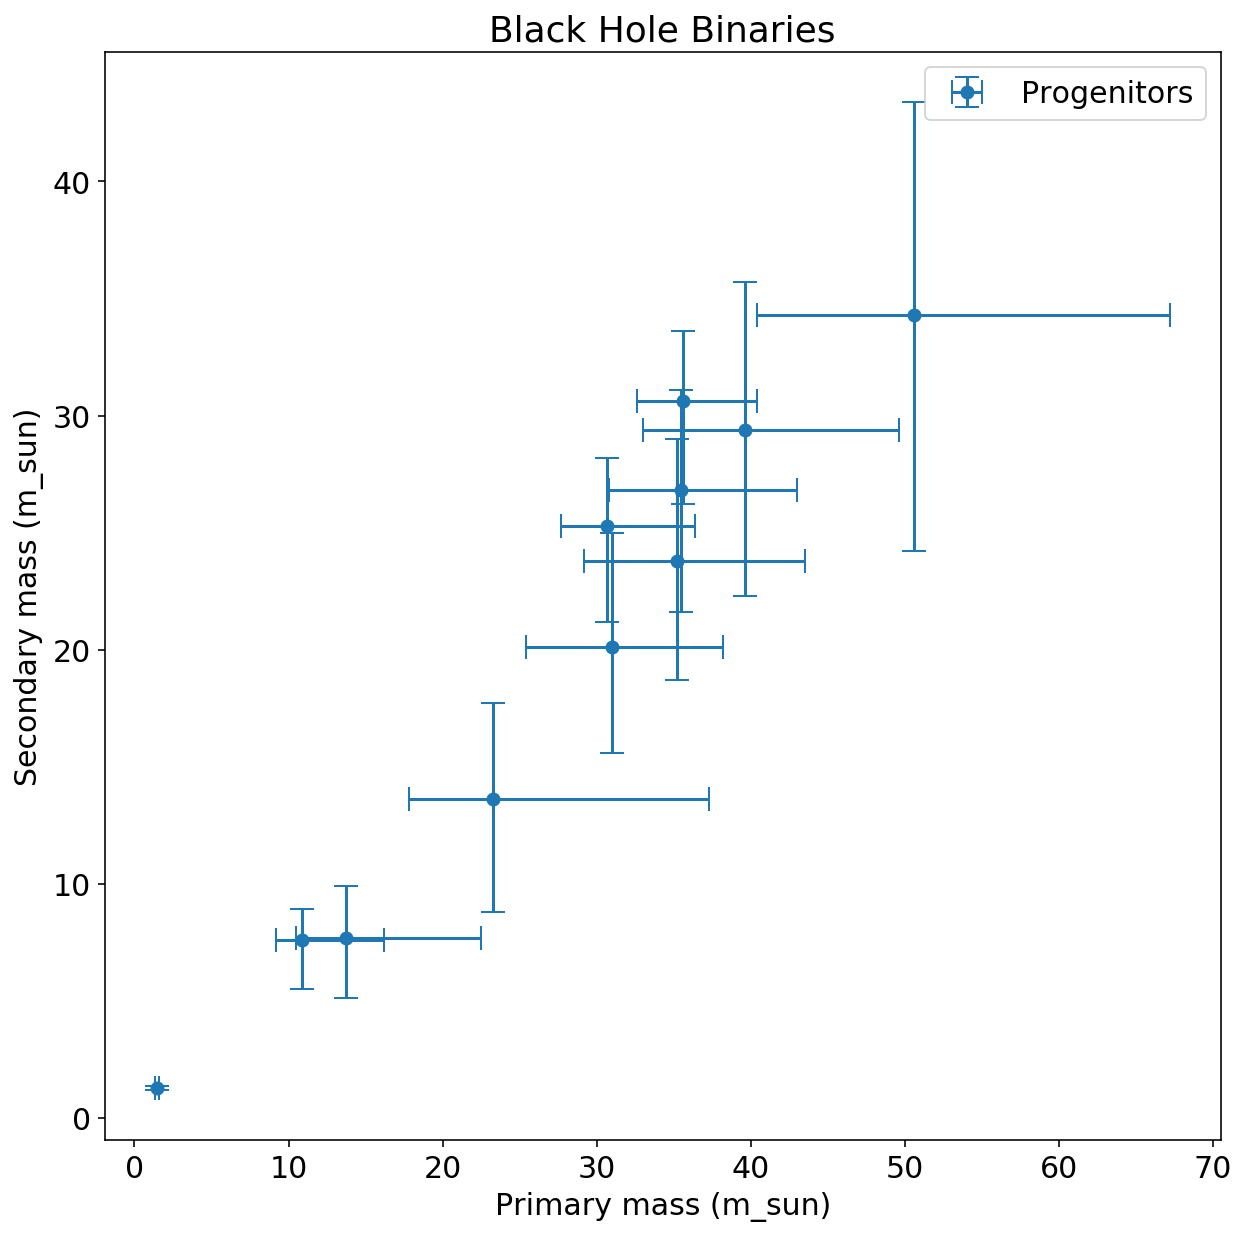

In [23]:
fig = plt.figure(figsize = (10,10))
plt.errorbar(p_mass,s_mass, xerr = (p_dnerr,p_uperr), yerr = (s_dnerr,s_uperr),  
             label = 'Progenitors', linestyle = '', capsize = 6, marker = 'o')
plt.xlabel('Primary mass (m_sun)')
plt.ylabel('Secondary mass (m_sun)')
plt.title('Black Hole Binaries')
plt.legend();

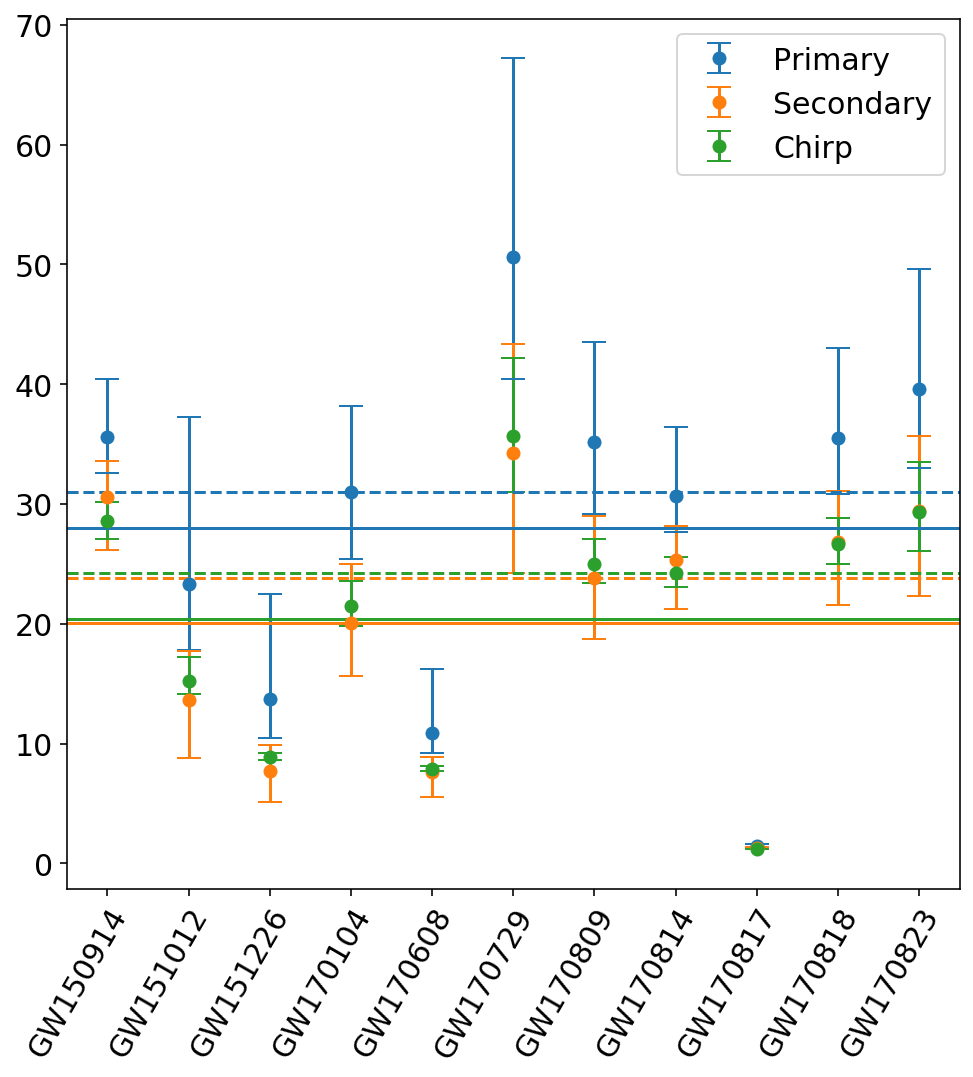

In [27]:
p_ave = np.mean(p_mass)
s_ave = np.mean(s_mass)
c_ave = np.mean(c_mass)
p_med = np.median(p_mass)
s_med = np.median(s_mass)
c_med = np.median(c_mass)


fig, ax = plt.subplots(figsize = (8,8))
ax.errorbar(eventlist,p_mass, yerr = (p_dnerr,p_uperr), label = 'Primary',
            linestyle = '', capsize = 6, marker = 'o')
ax.errorbar(eventlist,s_mass, yerr = (s_dnerr,s_uperr), label = 'Secondary', 
            linestyle = '', capsize = 6, marker = 'o')
ax.errorbar(eventlist,c_mass, yerr = (c_dnerr,c_uperr), label = 'Chirp', 
            linestyle = '', capsize = 6, marker = 'o')

ax.axhline(p_ave, color = 'C0')
ax.axhline(s_ave, color = 'C1')
ax.axhline(c_ave, color = 'C2')
ax.axhline(p_med, color = 'C0', linestyle = '--')
ax.axhline(s_med, color = 'C1', linestyle = '--')
ax.axhline(c_med, color = 'C2', linestyle = '--')

ax.legend()
plt.setp(ax.get_xticklabels(), rotation=60, ha="right",
         rotation_mode="anchor");

This is good!  Median might be more robust than mean...  try plotting that.

The solid lines are the means and the dashed lines are the medians.

###  Marginal triggers

In [24]:
csv_marginals = pd.read_json('./marginal.json', orient='records')

In [25]:
csv_marginals = pd.read_csv('./marginals_copied.csv')

In [26]:
csv_marginals

,Event,GPS Time (s),FAR (yr^-1),Pipeline,Network SNR,Detector Frame Chirp Mass (M_sun),Data Quality
0,151008,1.128349e+09,10.17,pycbc,8.8,5.12,No artifacts
1,151012A,1.128667e+09,8.56,gstlal,9.6,2.01,Artifacts present
2,151116,1.131749e+09,4.77,pycbc,9.0,1.24,No artifacts
3,161202,1.164686e+09,6.00,gstlal,10.5,1.54,Artifacts can account for
4,161217,1.165994e+09,10.12,gstlal,10.7,7.86,Artifacts can account for
5,170208,1.170586e+09,11.18,gstlal,10.0,7.39,Artifacts present
6,170219,1.171548e+09,6.26,gstlal,9.6,1.53,No artifacts
7,170405,1.175426e+09,4.55,gstlal,9.3,1.44,Artifacts present
8,170412,1.176048e+09,8.22,gstlal,9.7,4.36,Artifacts can account for
9,170423,1.176985e+09,6.47,gstlal,8.9,1.17,No artifacts


In [27]:
csv_marginals.columns

Index(['Event', 'GPS Time (s)', 'FAR (yr^-1)', 'Pipeline', 'Network SNR',
       'Detector Frame Chirp Mass (M_sun)', 'Data Quality'],
      dtype='object')

In [30]:
mg = csv_marginals['Detector Frame Chirp Mass (M_sun)']
mg_events = csv_marginals['Event']
mg_SNRlist = csv_marginals['Network SNR']

mg_mass = []
for i in range(len(mg.values)):
    mass = mg.values[i]
    mg_mass.append(mass)
    
print(mg_mass)
mg_ave = np.mean(mg_mass)

mg_snr = []
for i in range(len(mg_SNRlist.values)):
    snr = mg_SNRlist.values[i]
    mg_snr.append(snr)
    
print(mg_mass)
mg_ave = np.mean(mg_mass)


eventlist_mg = []

for i in range(len(mg_events.values)):
    ev = mg_events.values[i][0:8]
    eventlist_mg.append(ev)
    #print(mg_events.values[i])
    
print(eventlist_mg)
#

[5.12, 2.01, 1.24, 1.54, 7.86, 7.39, 1.53, 1.44, 4.36, 1.17, 2.75, 0.9, 3.4, 5.96]
[5.12, 2.01, 1.24, 1.54, 7.86, 7.39, 1.53, 1.44, 4.36, 1.17, 2.75, 0.9, 3.4, 5.96]
['151008', '151012A', '151116', '161202', '161217', '170208', '170219', '170405', '170412', '170423', '170616', '170630', '170705', '170720']


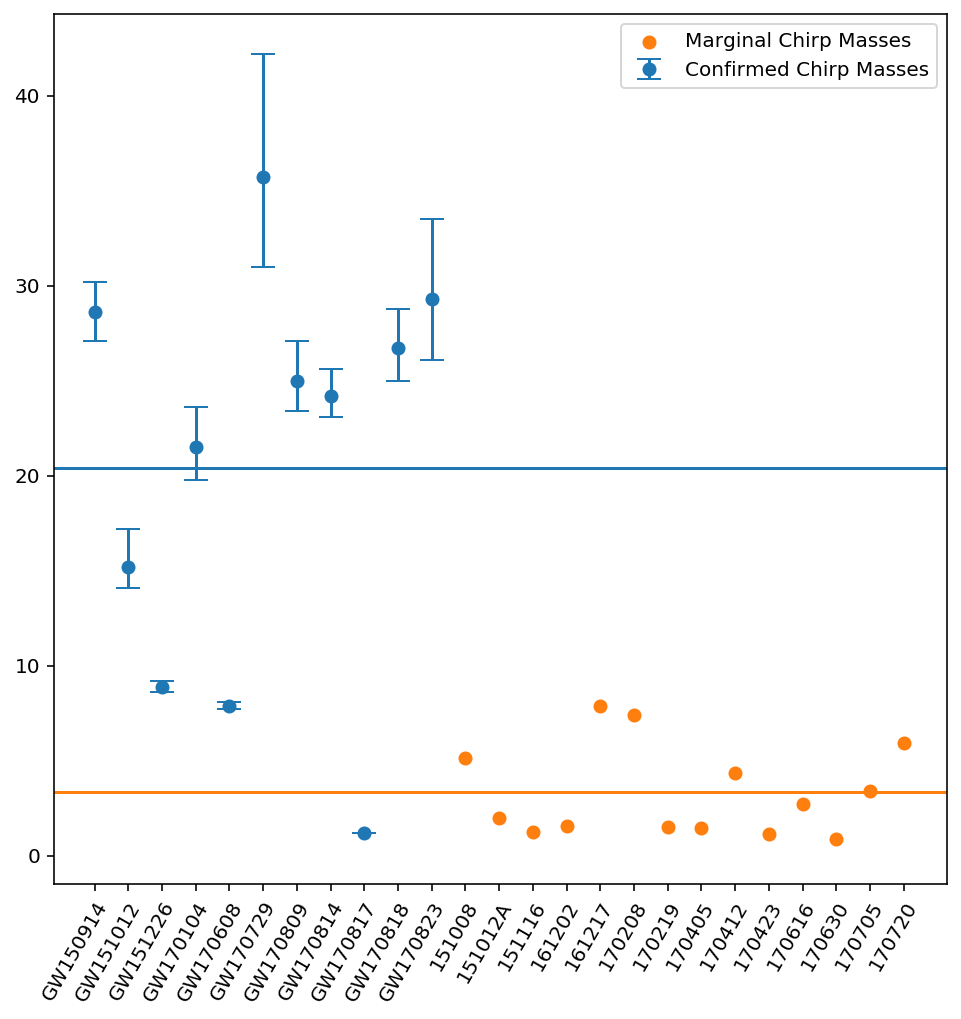

In [29]:
p_ave = np.mean(p_mass)
s_ave = np.mean(s_mass)
c_ave = np.mean(c_mass)

fig, ax = plt.subplots(figsize = (8,8))
ax.errorbar(eventlist,c_mass, yerr = (c_dnerr,c_uperr), label = 'Confirmed Chirp Masses', 
            linestyle = '', capsize = 6, marker = 'o')
ax.scatter(eventlist_mg,mg_mass, label = 'Marginal Chirp Masses',
           marker = 'o', color = 'C1')

ax.axhline(c_ave, color = 'C0')
ax.axhline(mg_ave, color = 'C1')


ax.legend()
plt.setp(ax.get_xticklabels(), rotation=60, ha="right",
         rotation_mode="anchor");

What is this tiny confirmed one? neutron-neutron?

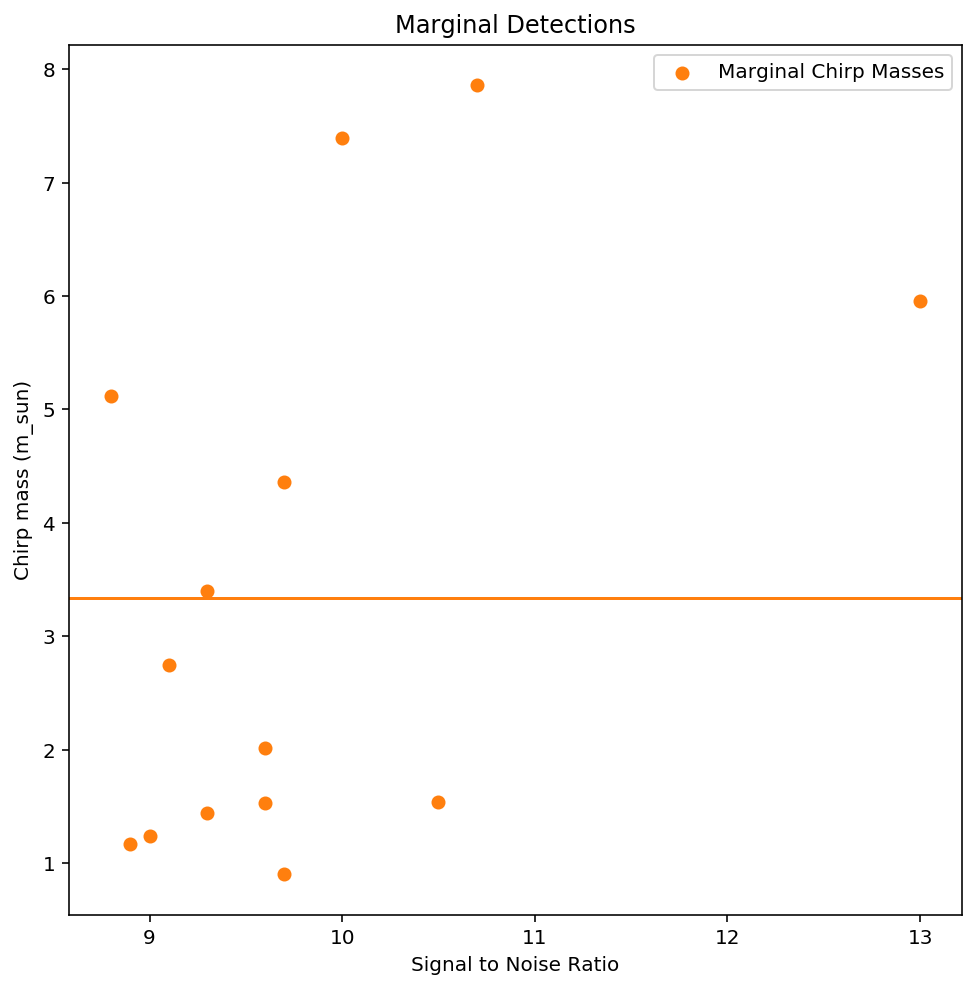

In [36]:
fig, ax = plt.subplots(figsize = (8,8))
#ax.errorbar(eventlist,c_mass, yerr = (c_dnerr,c_uperr), label = 'Confirmed Chirp Masses', 
#            linestyle = '', capsize = 6, marker = 'o')
ax.scatter(mg_snr,mg_mass, label = 'Marginal Chirp Masses', marker = 'o', color = 'C1')

#ax.axhline(c_ave, color = 'C0')
ax.axhline(mg_ave, color = 'C1')

plt.xlabel('Signal to Noise Ratio')
plt.ylabel('Chirp mass (m_sun)')
plt.title('Marginal Detections')



ax.legend()

Also plot chirp mass vs FAR

Any other marginal triggers plots with other noise measurements.  Some scatter plots.

3 plots: SNR, FAR, artifacts all vs mass 

do this for both marginals and confidents on the same plot

find a statistic that finds a division between these?  Is the the same as LIGO?

try kernel regression

FAR vs SNR color coded by whether there are artifacts or not

Also... MCMC to fit model